In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data = pd.read_excel('Potential datasets for recruitment.xlsx','Dataset 2')

In [5]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [6]:
data.shape

(699, 12)

In [7]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,0.0
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,NaN
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,NaN


# Data Preprocessing

In [8]:
target = data['Class: (2 for benign,  4 for malignant)']
list = ['Sample code number', ' 4 for malignant)']
relevant_data = data.drop(list,axis = 1 )
features = relevant_data.drop('Class: (2 for benign,  4 for malignant)', axis = 1)
features = features.drop('Mitoses', axis = 1)
#relevant_data.head()
features.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5,1,1,1,2,1,3,1
1,5,4,4,5,7,10,3,2
2,3,1,1,1,2,2,3,1
3,6,8,8,1,3,4,3,7
4,4,1,1,3,2,1,3,1


In [9]:
print("data shape : ",data.shape)
print("relevant_data shape : ",relevant_data.shape)
print("target shape : ",target.shape)
print("features shape : ",features.shape)

data shape :  (699, 12)
relevant_data shape :  (699, 10)
target shape :  (699,)
features shape :  (699, 8)


hence there are total of 699 samples and 9 features

In [10]:
features['Bare Nuclei'].values

array([1, 10, 2, 4, 1, 10, 10, 1, 1, 1, 1, 1, 3, 3, 9, 1, 1, 1, 10, 1, 10,
       7, 1, '?', 1, 7, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 10, 7, '?', 3,
       10, 1, 1, 1, 9, 1, 1, 8, 3, 4, 5, 8, 8, 5, 6, 1, 10, 2, 3, 2, 8, 2,
       1, 2, 1, 10, 9, 1, 1, 2, 1, 10, 4, 2, 1, 1, 3, 1, 1, 1, 1, 2, 9, 4,
       8, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 10, 5, 5, 1, 3, 1, 3, 10,
       10, 1, 9, 2, 9, 10, 8, 3, 5, 2, 10, 3, 2, 1, 2, 10, 10, 7, 1, 10,
       1, 10, 1, 1, 1, 10, 1, 1, 2, 1, 1, 1, '?', 1, 1, 5, 5, 1, '?', 8,
       2, 1, 10, 1, 10, 5, 3, 1, 10, 1, 1, '?', 10, 10, 1, 1, 3, '?', 2,
       10, 1, 1, 1, 1, 1, 1, 10, 10, 10, 1, 1, 1, 10, 1, 1, 1, 10, 10, 1,
       8, 10, 8, 1, 8, 10, 1, 1, 1, 1, 7, 1, 1, 1, 10, 10, 1, 1, 1, 10, 5,
       1, 1, 1, 10, 8, 1, 10, 10, 5, 1, 1, 4, 1, 1, 10, 5, 8, 10, 1, 10,
       5, 1, 10, 7, 8, 1, 10, 1, '?', 10, 2, 9, 10, 2, 1, 1, 5, 1, 2, 10,
       9, 1, '?', 1, 10, 10, 10, 8, 10, 1, 1, 1, 8, 10, 10, 10, 10, 3, 1,
       10, 10, 4, 1, 10, 1, 10, 4, 1, 

"Bare Nuclei" feature happen to be numerical value but it contains some of non-numeric values '?', these are needed to be removed

In [11]:
#replacing non-numeric '?' values with the mean of the feature
cols = ['Bare Nuclei']
for column in cols:
        relevant_data.loc[relevant_data[column] == '?', column] = pd.to_numeric(0)
        features.loc[features[column] == '?', column] = pd.to_numeric(0)
        #replacing 0 by mean of the feature
        relevant_data.loc[relevant_data[column] == 0, column] = features[column].mean()
        features.loc[features[column] == 0, column] = features[column].mean()

In [12]:
#relevant_data.describe()
features.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.542799,3.437768,2.866953
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601872,2.438364,3.053634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Data Visualization

Number of Benign Samples:  458
Number of Malignant Samples:  241


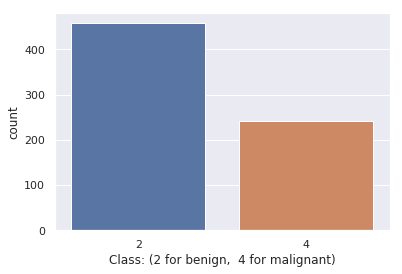

In [13]:
ax = sn.countplot(target,label="Total Samples Count")       
benign, malignant = target.value_counts()
print('Number of Benign Samples: ',benign)
print('Number of Malignant Samples: ',malignant)

In [20]:
relevant_data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


#1.lets check out the distribution of features

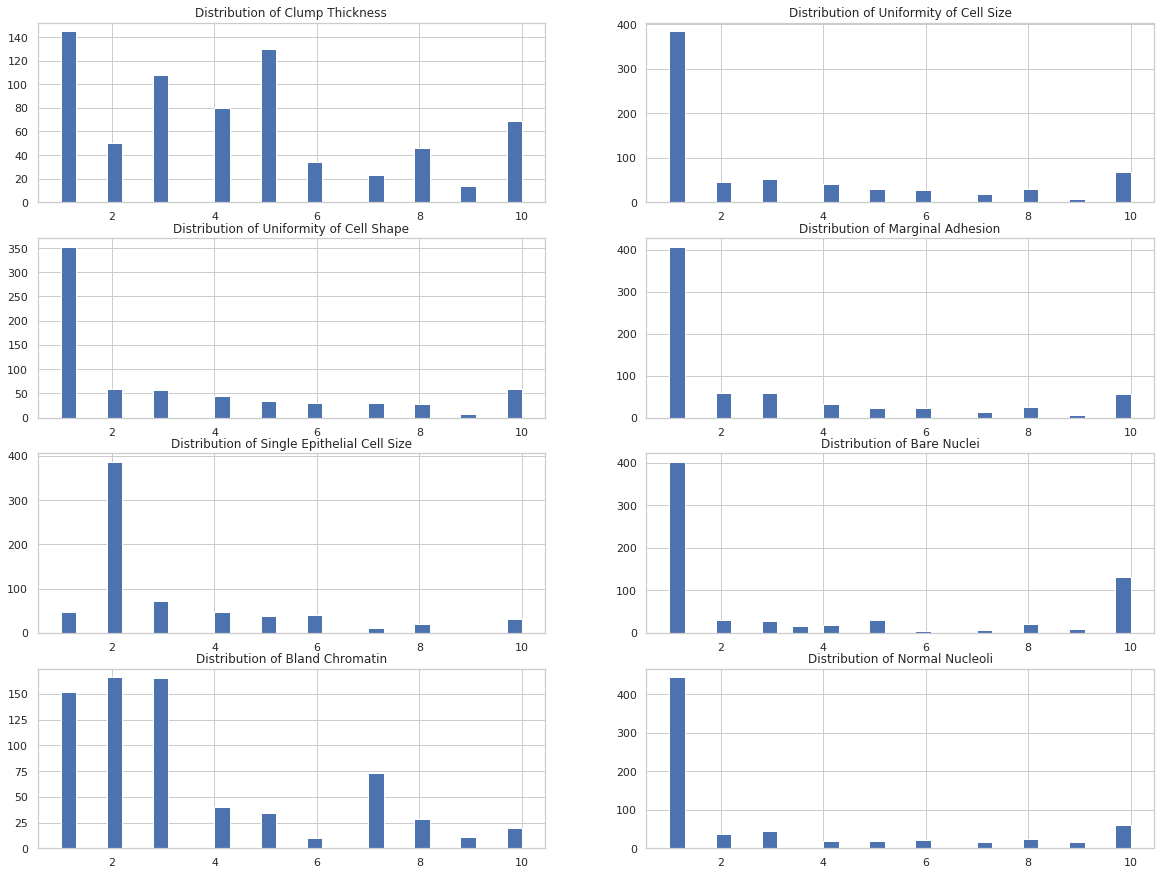

In [48]:
# import seaborn as sns
# fig = plt.figure(figsize=(20,8))
# ax = fig.gca()
# sns.set_style("whitegrid")
# for col in features.columns:
#     sns.kdeplot(features[col], ax = ax)
    
import seaborn as sns
fig = plt.figure(figsize=(20,35))
ax = fig.gca()
sns.set_style("whitegrid")
cols = features.columns
j = 1
for col in cols:
    plt.subplot(9,2,j)
    j = j + 1
    #sns.kdeplot(new_df_en[col], ax = ax)
    plt.hist(features[col], bins=30)
    plt.title("Distribution of "+col)

# Performing Log(1 + x) transformation

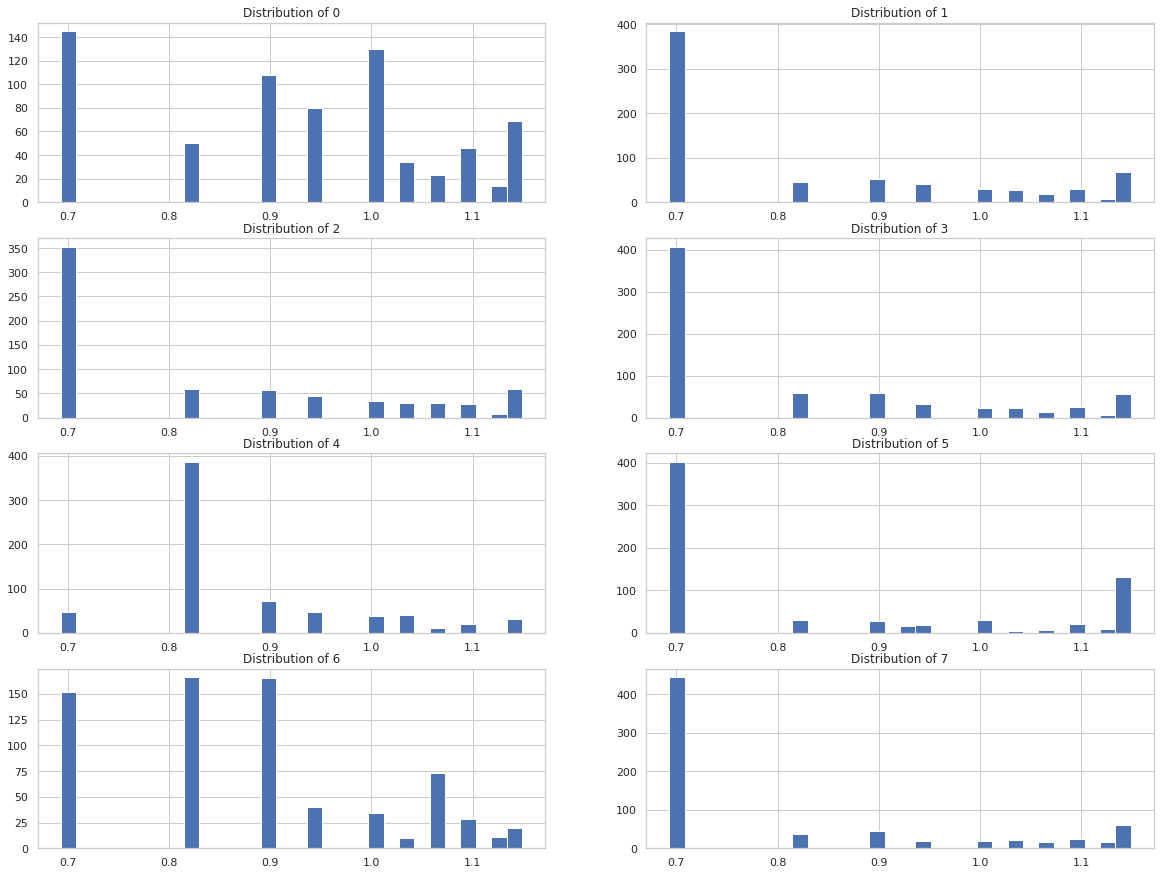

In [47]:
import math
from sklearn.preprocessing import FunctionTransformer
#transformer = FunctionTransformer(np.log1p, validate=False)
trans_features = features.values
trans_features = np.log(1 + trans_features**(1/3))
trans_features_df = pd.DataFrame(trans_features)
#ploting normalized feature distribution
# import seaborn as sns
# fig = plt.figure(figsize=(20,8))
# ax = fig.gca()
# sns.set_style("whitegrid")
# for col in range(8):
#     sns.kdeplot(trans_features_df[col], ax = ax)
import seaborn as sns
fig = plt.figure(figsize=(20,35))
ax = fig.gca()
sns.set_style("whitegrid")
cols = trans_features_df.columns
j = 1
for col in cols:
    plt.subplot(9,2,j)
    j = j + 1
    #sns.kdeplot(new_df_en[col], ax = ax)
    plt.hist(trans_features_df[col], bins=30)
    plt.title("Distribution of "+str(col))

# Performing Data Standardization

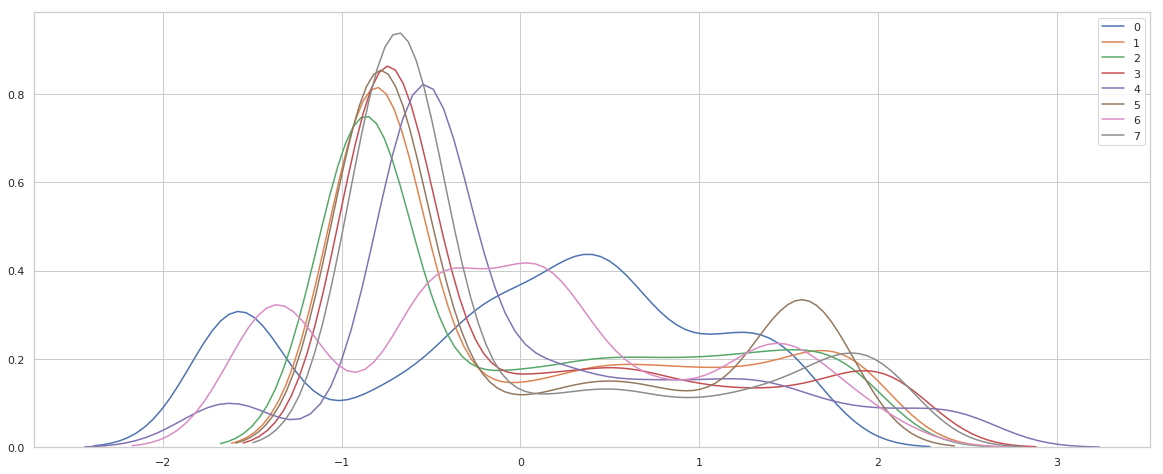

In [16]:
from sklearn import preprocessing
#stand_features = features.values
scaler = preprocessing.StandardScaler().fit(trans_features)
stand_features = scaler.transform(trans_features)
stand_features_df = pd.DataFrame(stand_features)
#ploting standardized feature distribution
import seaborn as sns
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
sns.set_style("whitegrid")
for col in range(8):
    sns.kdeplot(stand_features_df[col], ax = ax)

Feature Distribution now resumble normal gaussian distribution closely, thus removing skewness to certain extent

In [17]:
newtarget = np.zeros(len(target), dtype=str)
for i in range(len(target)):
    newtarget[i] = str(target[i])
newframe = pd.DataFrame(pd.concat([stand_features_df, pd.DataFrame(newtarget)], axis = 1))
newframe = pd.DataFrame(newframe.values)
newframe.head()

,0,1,2,3,4,5,6,7,8
0,0.462142,-0.80718,-0.868848,-0.742313,-0.540242,-0.783395,0.101543,-0.687317,2
1,0.462142,0.697284,0.65815,1.13559,1.71992,1.61938,0.101543,0.032197,2
2,-0.235874,-0.80718,-0.868848,-0.742313,-0.540242,-0.139108,0.101543,-0.687317,2
3,0.722341,1.56172,1.53553,-0.742313,0.150636,0.574476,0.101543,1.52696,2
4,0.151546,-0.80718,-0.868848,0.492583,-0.540242,-0.783395,0.101543,-0.687317,2


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(stand_features, target,test_size=0.2)

# using Gaussian Naive Bayes

              precision    recall  f1-score   support

     class 2       1.00      0.96      0.98        93
     class 4       0.92      1.00      0.96        47

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140

accuracy_score            :  0.9714285714285714
f1_score                  :  0.969558599695586
classifier training score :  0.9695885509838998
classifier testing score  :  0.9714285714285714
cross validation score    :  0.9700659340659341


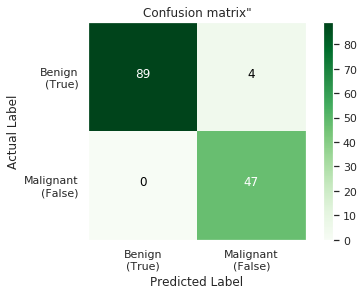

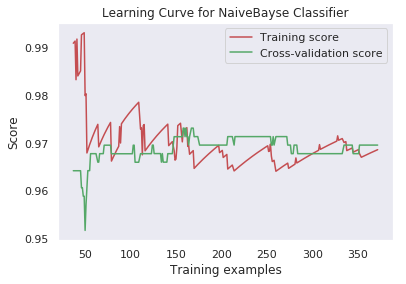

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, stand_features, target, cv=50)
print(classification_report(y_test, y_pred, target_names=['class 2', 'class 4']))
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).ravel()
class_names = ['Benign\n(True)', 'Malignant\n(False)']
cm = cm.reshape(2,2)
plot_confusion_matrix(cm,classes=class_names) 

plot_learning_curve(estimator = classifier, 
                            title     = "Learning Curve for NaiveBayse Classifier", 
                            X         = x_train, 
                            y         = y_train, 
                            cv = 3)
plt.show()

# using DecisionTreeClassifier

              precision    recall  f1-score   support

     class 2       0.96      0.98      0.97        93
     class 4       0.96      0.91      0.93        47

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

accuracy_score            :  0.9571428571428572
f1_score                  :  0.9516832014989032
classifier training score :  1.0
classifier testing score  :  0.9571428571428572
cross validation score    :  0.9525567765567766


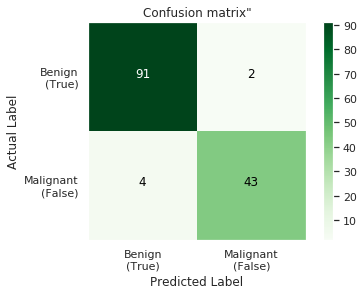

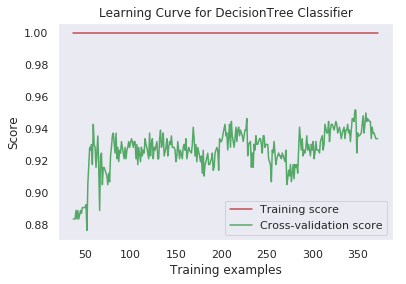

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, stand_features, target, cv=50)


print(classification_report(y_test, y_pred, target_names=['class 2', 'class 4']))
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())

#plotting confusion matrix for this predictor
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).ravel()
class_names = ['Benign\n(True)', 'Malignant\n(False)']
cm = cm.reshape(2,2)
plot_confusion_matrix(cm,classes=class_names) 

plot_learning_curve(estimator = classifier, 
                            title     = "Learning Curve for DecisionTree Classifier", 
                            X         = x_train, 
                            y         = y_train, 
                            cv = 3)
plt.show()

# using Random Forest Classifier

              precision    recall  f1-score   support

     class 2       0.99      0.98      0.98        93
     class 4       0.96      0.98      0.97        47

   micro avg       0.98      0.98      0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

accuracy_score            :  0.9785714285714285
f1_score                  :  0.9761643572438073
classifier training score :  1.0
classifier testing score  :  0.9785714285714285
cross validation score    :  0.9715897435897438


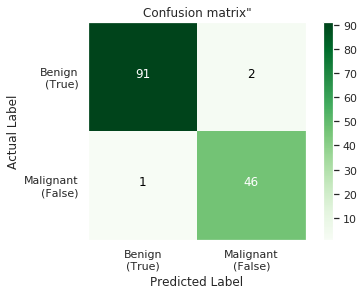

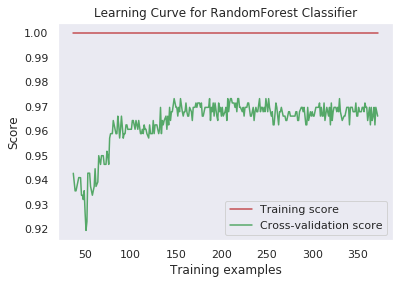

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, stand_features, target, cv=50)
print(classification_report(y_test, y_pred, target_names=['class 2', 'class 4']))
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).ravel()
class_names = ['Benign\n(True)', 'Malignant\n(False)']
cm = cm.reshape(2,2)
plot_confusion_matrix(cm,classes=class_names) 

plot_learning_curve(estimator = classifier, 
                            title     = "Learning Curve for RandomForest Classifier", 
                            X         = x_train, 
                            y         = y_train, 
                            cv = 3)
plt.show()

# using OneVsRest Classifier

              precision    recall  f1-score   support

     class 2       0.99      0.97      0.98        93
     class 4       0.94      0.98      0.96        47

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

accuracy_score            :  0.9714285714285714
f1_score                  :  0.968540445773429
classifier training score :  0.9731663685152058
classifier testing score  :  0.9714285714285714
cross validation score    :  0.9701611721611723


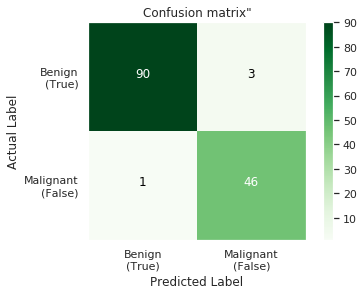

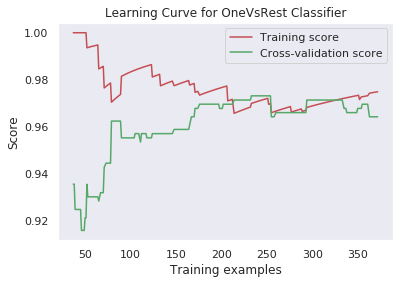

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  OneVsRestClassifier(SVC(kernel='linear'))
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, stand_features, target, cv=50)
print(classification_report(y_test, y_pred, target_names=['class 2', 'class 4']))
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).ravel()
class_names = ['Benign\n(True)', 'Malignant\n(False)']
cm = cm.reshape(2,2)
plot_confusion_matrix(cm,classes=class_names) 

plot_learning_curve(estimator = classifier, 
                            title     = "Learning Curve for OneVsRest Classifier", 
                            X         = x_train, 
                            y         = y_train, 
                            cv = 3)
plt.show()

# using OneVsOne Classifier

              precision    recall  f1-score   support

     class 2       1.00      0.95      0.97        93
     class 4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

accuracy_score            :  0.9642857142857143
f1_score                  :  0.9624039959181481
classifier training score :  0.9767441860465116
classifier testing score  :  0.9642857142857143
cross validation score    :  0.9700659340659341


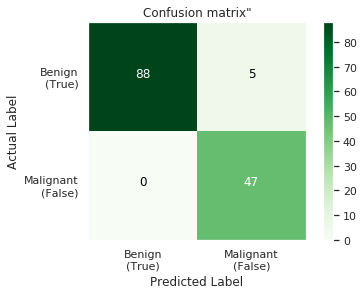

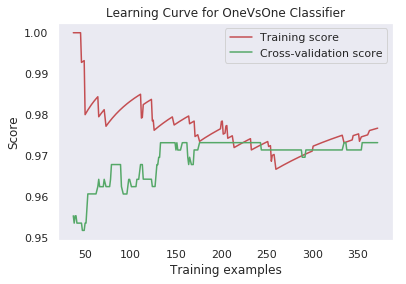

In [38]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  OneVsOneClassifier(SVC(kernel='rbf', gamma='scale'))
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, stand_features, target, cv=50)
print(classification_report(y_test, y_pred, target_names=['class 2', 'class 4']))
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).ravel()
class_names = ['Benign\n(True)', 'Malignant\n(False)']
cm = cm.reshape(2,2)
plot_confusion_matrix(cm,classes=class_names) 

plot_learning_curve(estimator = classifier, 
                            title     = "Learning Curve for OneVsOne Classifier", 
                            X         = x_train, 
                            y         = y_train, 
                            cv = 3)
plt.show()

# Solution 2(a)

In [31]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Greens) :
    plt.imshow(cm,  cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.grid(False)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

#

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 300)):
    
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt
